In [510]:
import numpy
import pylab
import pandas
import matplotlib.pyplot as plt
import math
from pandas import Series
from scipy import linalg


In [244]:
Malay_total_confirmed = numpy.loadtxt(open("E:/Malaysia_Data/total_cases.csv","rb"),delimiter=",",skiprows=0)
Malay_total_vaccinated = numpy.loadtxt(open("E:/Malaysia_Data/total_vaccinated.csv","rb"),delimiter=",",skiprows=0)
Malay_new_vaccinated = numpy.loadtxt(open("E:/Malaysia_Data/new_vaccinated.csv","rb"),delimiter=",",skiprows=0)
Malay_new_confirmed = numpy.loadtxt(open("E:/Malaysia_Data/new_cases.csv","rb"),delimiter=",",skiprows=0)

In [245]:
print(len(Malay_new_confirmed))
print(len(Malay_total_confirmed))
print(len(Malay_new_vaccinated))
print(len(Malay_total_vaccinated))

489
489
489
489


31566541.800000012

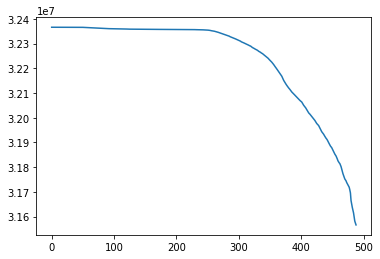

In [246]:
# 总人口
total_person = 32365998
# 疫苗作用率
# immune_rate = 0.4
# 传播率
# beta  = 0.02  
#疫苗在人群中的作用率
alpha = 0.1
# 每日新增
Malay_new_confirmed = list(Malay_new_confirmed)
# 总共确诊
Malay_total_confirmed = list(Malay_total_confirmed)
# 总共接种
Malay_total_vaccinated = list(Malay_total_vaccinated)
# 当日接种
Malay_new_vaccinated = list(Malay_new_vaccinated)

# 分别将total_confirmed ,new_confirmed,total_vaccinated 转化成int
new_confirmed = []
for i in Malay_new_confirmed:
    i = int(i)
    new_confirmed.append(i)
    
total_vaccinated = []
for i in Malay_total_vaccinated:
    i = int(i)
    total_vaccinated.append(i)
    
total_confirmed = []
for i in Malay_total_confirmed:
    i = int(i)
    total_confirmed.append(i)

new_vaccinated = []
for i in Malay_new_vaccinated:
    i = int(i)*alpha
    new_vaccinated.append(i)
# # 每日新增人数与疫苗人数之和
I_add_V = list(map(lambda x:(x[0]+x[1]),zip(new_confirmed,new_vaccinated))) 

Suspectible = []
for i in I_add_V:
    total_person = total_person - i
    Suspectible.append(total_person)
    
# # pylab.xlim(300,410)   
plot1 = pylab.plot(Suspectible, label='Suspectible')
Suspectible[-1]
# plot2 = pylab.plot(I_add_V)

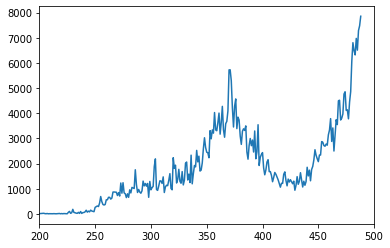

In [247]:
pylab.xlim(200,500)
plot1 = pylab.plot(new_confirmed)

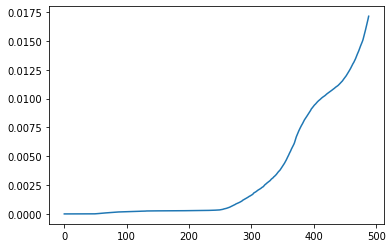

In [248]:
beta = list(map(lambda x:(x[0]/x[1]),zip(total_confirmed,Suspectible))) 
# pylab.xlim(300,450) 

# print(" AIR of turning point = ",(beta[411]))
plot2 = pylab.plot(beta, label='beta') 

In [249]:
Malay_beta_pd= pandas.DataFrame(beta) 
Malay_beta_pd.to_csv('E:/Malaysia_Data/beta.csv',index=False,mode='a',header=None)
print(len(beta))
print(len(Suspectible))

489
489


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


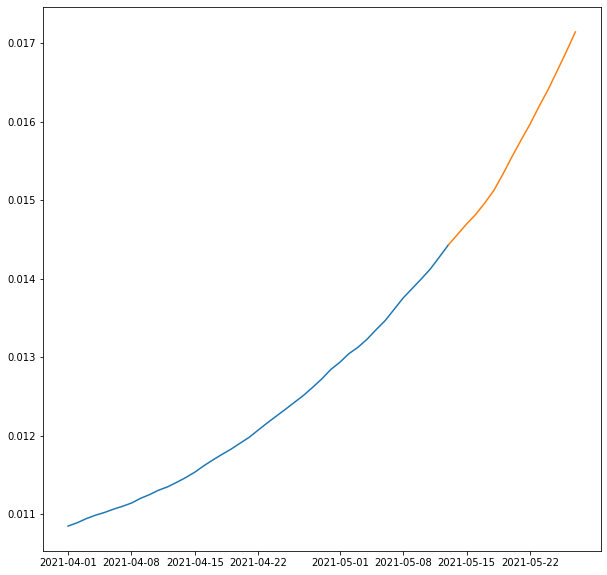

In [720]:
import pandas as pd
import matplotlib.pyplot as plt
Malay_beta = pd.read_csv('E:/Malaysia_Data/beta.csv',index_col = 'Date',parse_dates=['Date'])
sub = Malay_beta['2020/10':'2021/5']['Beta']
train = sub.ix['2021/4/01':'2021/5/13']
# print(type(train))
test = sub.ix['2021/5/13':'2021/5/27']
plt.figure(figsize=(10,10))
# print(train)
plt.plot(train)
plt.plot(test)
plt.show()

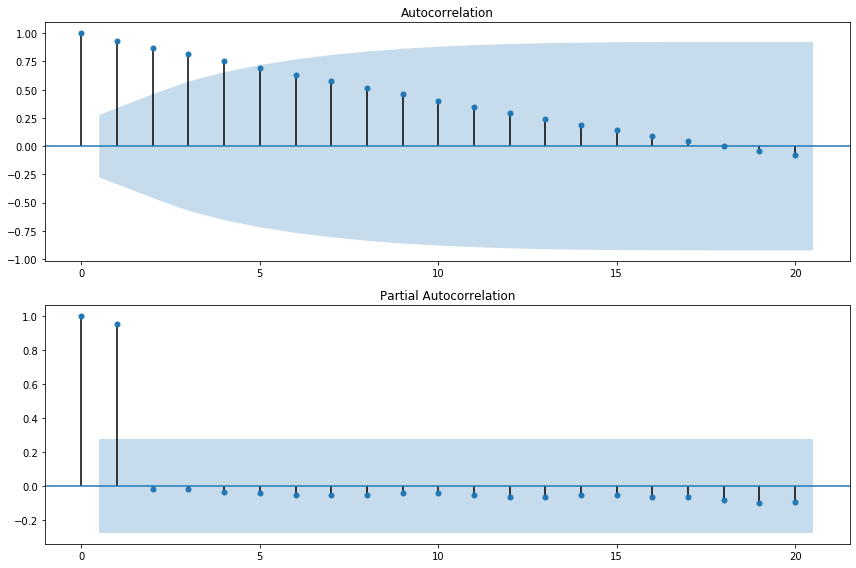

In [707]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning

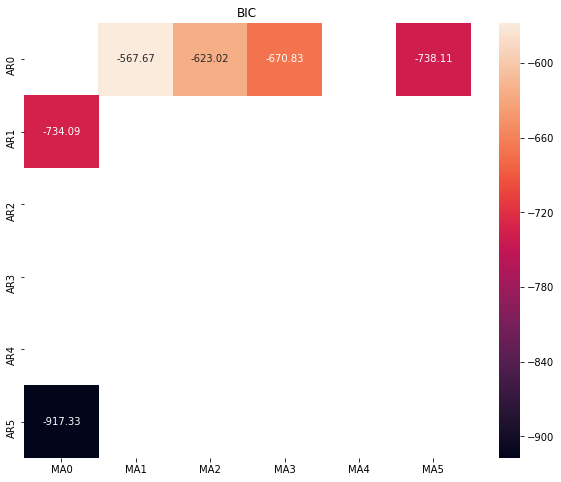

In [708]:
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
#                                enforce_stationarity=False,
#                                enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

In [698]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: He

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: He

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: Co

AIC (3, 1)
BIC (3, 1)


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<Figure size 864x576 with 0 Axes>

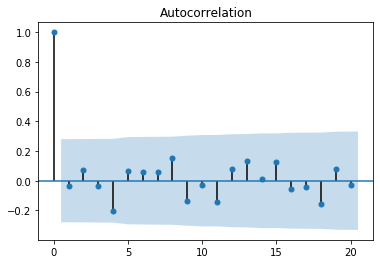

In [711]:
model = sm.tsa.ARIMA(train, order=(3,1,0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2020-10-02    0.000105
2020-10-03    0.000010
2020-10-04    0.000011
2020-10-05    0.000010
2020-10-06    0.000013
2020-10-07    0.000019
2020-10-08    0.000016
2020-10-09    0.000014
2020-10-10    0.000012
2020-10-11    0.000012
2020-10-12    0.000016
2020-10-13    0.000017
2020-10-14    0.000020
2020-10-15    0.000021
2020-10-16    0.000020
2020-10-17    0.000020
2020-10-18    0.000025
2020-10-19    0.000026
2020-10-20    0.000027
2020-10-21    0.000027
2020-10-22    0.000024
2020-10-23    0.000026
2020-10-24    0.000023
2020-10-25    0.000035
2020-10-26    0.000027
2020-10-27    0.000037
2020-10-28    0.000028
2020-10-29    0.000028
2020-10-30    0.000022
2020-10-31    0.000025
                ...   
2021-04-28    0.000088
2021-04-29    0.000098
2021-04-30    0.000103
2021-05-01    0.000116
2021-05-02    0.000098
2021-05-03    0.000109
2021-05-04    0.000086
2021-05-05    0.000101
2021-05-06    0.000113
2021-05-07    0.000114
2021-05-08    0.000137
2021-05-09    0.000141
2021-05-10 

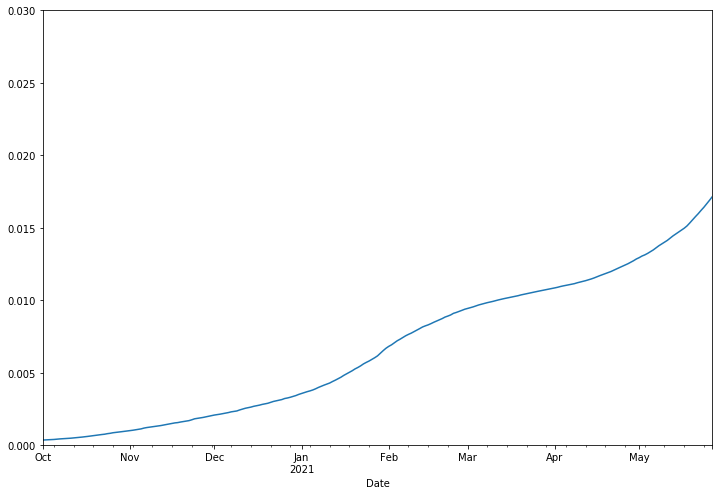

(array([0.01739386, 0.01764048, 0.01788707, 0.01813274, 0.01837747,
       0.01862142, 0.01886454, 0.01910684, 0.01934833, 0.019589  ,
       0.01982887]), array([1.40014257e-05, 2.78614691e-05, 4.32499193e-05, 6.08982363e-05,
       8.04218620e-05, 1.01558143e-04, 1.24200275e-04, 1.48235914e-04,
       1.73565114e-04, 2.00107712e-04, 2.27793865e-04]), array([[0.01737083, 0.01741689],
       [0.01759465, 0.0176863 ],
       [0.01781593, 0.01795821],
       [0.01803257, 0.01823291],
       [0.01824519, 0.01850975],
       [0.01845437, 0.01878847],
       [0.01866025, 0.01906883],
       [0.01886301, 0.01935067],
       [0.01906284, 0.01963381],
       [0.01925985, 0.01991815],
       [0.01945418, 0.02020356]]))


In [750]:
model = sm.tsa.ARIMA(sub, order=(3,1,0))
results = model.fit()
predict_sunspots = results.predict()
predict_beta = results.predict()
forecast_beta = results.forecast(11,alpha = 0.1)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
plt.ylim(0,0.03)
plt.show()
print(forecast_beta)

In [749]:
AIR_Forecast = forecast_beta[0]
AIR_Forecast = pandas.DataFrame(AIR_Forecast)
AIR_Forecast.to_csv('E:/Malaysia_Data/AIR_forecast.csv',index =False,mode = 'a' ,header = None) 
stand_error_AIR = pandas.DataFrame(forecast_beta[1])
print(stand_error_AIR)

# stand_error_AIR.to_csv('E:/Malaysia_Data/stand_error_AIR.csv',index =False,mode = 'a' ,header = None) 

           0
0   0.000014
1   0.000028
2   0.000043
3   0.000061
4   0.000080
5   0.000102
6   0.000124
7   0.000148
8   0.000174
9   0.000200
10  0.000228


In [ ]:
print(len(predict_beta[1:]))
print(len(Suspectible[251:]))
predict_beta = pandas.DataFrame(predict_beta)
predict_beta.to_csv('E:/Malaysia_Data/AIR_fitted.csv',index = False,mode = 'a',header = None) 
forecast_AIR = pandas.DataFrame(forecast_beta[2])
# forecast_AIR.to_csv('E:/Malaysia_Data/AIR_forecast.csv',index = False,mode = 'a',header = None) 

In [ ]:
predict_beta = Malay_new_confirmed = numpy.loadtxt(open("E:/Malaysia_Data/AIR_fitted.csv","rb"),delimiter=",",skiprows=0)
total_cases_predict = list(map(lambda x:(x[0]*x[1]),zip(predict_beta[1:],Suspectible[251:])))
total_cases_predict = pandas.DataFrame(total_cases_predict)
total_cases_predict.to_csv('E:/Malaysia_Data/total_confirmed_predict.csv',index=False,mode='a',header=None)
# print(total_cases_predict)

forecast_beta = results.forecast(10,alpha = 0.1)
print(forecast_beta[0])

In [ ]:
import pylab
import numpy as np

x = np.arange(1, 21,1)
total_Vacctions_Actually = np.array([
1679765,
1707460,
1734348,
1766651,
1766651,
1876591,
1894630,
1894630,
1894779,
1905529,
1915824,
1976085,
2052636,
2303580,
2384183,
2444780,
2489988,
2535975,
2630984,
2730536,
])
z1 = np.polyfit(x, total_Vacctions_Actually, 1)        # 曲线拟合，返回值为多项式的各项系数
p1 = np.poly1d(z1)                    # 返回值为多项式的表达式，也就是函数式子
print(p1)
y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
print(int(np.polyval(p1, 23)))            # 根据多项式求解特定 x 对应的 y 值


plot1 = pylab.plot(x, total_Vacctions_Actually, '*', label='original values')
plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
pylab.title('')
pylab.xlabel('')
pylab.ylabel('')
pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
pylab.show()

In [729]:
Total_vacc_forecast2 = []
for i in range(23,35):
    tvf = int(np.polyval(p1,i))
    Total_vacc_forecast2.append(tvf)
print(Total_vacc_forecast2)

[2765624, 2820531, 2875439, 2930346, 2985254, 3040161, 3095069, 3149976, 3204884, 3259791, 3314699, 3369606]


In [737]:
print(forecast_beta[0])
print("--------------我是一条分割线---------------")
print("S0 = ",S0)
# print(len(forecast_beta[0]) ==len(forecast_beta[1]))

S0 =31566541

Total_vacc_forecast = []
for i in range(22,33):
    tvf = int(np.polyval(p1,i))
    Total_vacc_forecast.append(tvf)
print(Total_vacc_forecast)


mid_CMMU = []
Suspectible_forecast =[]
for i in Total_vacc_forecast:
    SF = int(S0-i*0.1)
    Suspectible_forecast.append(SF)
print("Suspectible_forecast===",len(Suspectible_forecast))

Suspectible_forecast = pandas.DataFrame(Suspectible_forecast)
Suspectible_forecast.to_csv('E:/Malaysia_Data/Suspectible_forecast.csv',index = False,mode = 'a',header = None)
cmm_list = []
cmmu_list = list(map(lambda x:(x[0]*x[1]),zip(forecast_beta[0],Suspectible_forecast)))
# print("---------------------分割线--------------")
cmmu_list = cmmu_list[1:]
# print("cmmu_list = ",cmmu_list)

cmmu_list = pandas.DataFrame(cmmu_list)
# cmmu_list.to_csv('E:/Malaysia_Data/mid_cmmu.csv',index = False,mode = 'a',header = None)
# mid_CMMU.to_csv('E:/Malaysia_Data/mid_CMMU.csv',index =False,mode = 'a' ,header = None) 
# stand_error= []
# for i in forecast_beta[1]:
#     se = i*31615130
#     stand_error.append(se)
# stand_error = pandas.DataFrame(stand_error)
# stand_error.to_csv('E:/Malaysia_Data/stand_error.csv',index =False,mode = 'a' ,header = None) 

[0.01739386 0.01764048 0.01788707 0.01813274 0.01837747 0.01862142
 0.01886454 0.01910684 0.01934833 0.019589   0.01982887]
--------------我是一条分割线---------------
S0 =  31566541
[2710716, 2765624, 2820531, 2875439, 2930346, 2985254, 3040161, 3095069, 3149976, 3204884, 3259791]
Suspectible_forecast=== 11


In [734]:
# print(forecast_beta)
minAIR = []
maxAIR = []

for i in range(11):
    minfit_AIR = float(forecast_beta[2][i][0])
    maxfit_AIR = float(forecast_beta[2][i][1])
    minAIR.append(minfit_AIR)
    maxAIR.append(maxfit_AIR)
minAIR = pandas.DataFrame(minAIR)
maxAIR = pandas.DataFrame(maxAIR)
minAIR.to_csv('E:/Malaysia_Data/min_AIR.csv',index = False,mode = 'a',header = None)
maxAIR.to_csv('E:/Malaysia_Data/max_AIR.csv',index = False,mode = 'a',header = None)



In [469]:
max_Cumu_cases_foecast = list(map(lambda x:(x[0]*[1]),zip(minAIR,Suspectible_forecast
min_Cumu_cases_foecast = list(map(lambda x:(x[0]*[1]),zip(maxAIR,Suspectible_forecast

In [438]:



max_Cumu_cases_foecast = pandas.DataFrame(max_Cumu_cases_foecast)
max_Cumu_cases_foecast.to_csv('E:/Malaysia_Data/max_Cumu_cases_foecast.csv',index =False,mode = 'a' ,header = None)

In [439]:
min_Cumu_cases_foecast = pandas.DataFrame(min_Cumu_cases_foecast)
min_Cumu_cases_foecast.to_csv('E:/Malaysia_Data/min_Cumu_cases_foecast.csv',index =False,mode = 'a' ,header = None)

In [747]:
Malay_SI = numpy.loadtxt(open("E:/Malaysia_Data/SI.csv","rb"),delimiter=",",skiprows=0)
population_denisty = 96.254
PSI = []
for i in Malay_SI:
    psi = population_denisty/i
    PSI.append(psi)
AIR_PSI = list(map(lambda x:(x[0]/x[1]),zip(beta,PSI)))     
Malay_AIR_PSI = pandas.DataFrame(AIR_PSI)
Malay_AIR_PSI.to_csv('E:/Malaysia_Data/AIR_PSI.csv',index=False,mode='a',header=None)

In [ ]:
predict_beta = pandas.DataFrame(predict_beta)
# predict_beta.to_csv('E:/Malaysia_Data/AIR_fitted.csv',index = False,mode = 'a',header = None) 
forecast_AIR = pandas.DataFrame(forecast_beta[2])

In [235]:
forecast_AIR = pandas.DataFrame(forecast_beta[2])

In [237]:
AIR_PSI_forcast  =[]
for air in forecast_beta[0]:
    AIR_PSI_forcast.append(air/PSI[-1])

array([0.01688509, 0.01711538, 0.01734759, 0.01757903, 0.01781329,
       0.0180486 , 0.01828444, 0.01852119, 0.01875863, 0.01899706])